In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
import pywt
import seaborn as sns
import scaleogram as scg 
import matplotlib.pyplot as plt
import matplotlib.gridspec as GridSpec
from mat4py import loadmat
from scipy.fftpack import fft
import wfdb
import re

In [5]:
# source wfdb
header_list = ["start1", "end1", "class1","start2", "end2", "class2","start3", "end3", "class3","start", "end", "class"]
record_list = wfdb.get_record_list('butqdb')
ecg_data=[]
ecg_labels=[]
for rcd in record_list:
    if re.search(r'ECG$', rcd):
        record_name = f"../aura-data/{rcd}"
        print(record_name)
        record_csv = f"../aura-data/{rcd.replace('ECG','ANN')}.csv"
        dataann = pd.read_csv(record_csv, names=header_list)
        dataann_nan_class = dataann[dataann["class"].notnull() & dataann["start"].notnull() & dataann["end"].notnull() ]
        for i in dataann_nan_class.index:
            record = wfdb.rdrecord(record_name, sampfrom=int(dataann_nan_class.start[i]), sampto=int(dataann_nan_class.end[i]))
            ecg_data.append(record.adc()[:5000,0].tolist())
            ecg_labels.append(int(dataann_nan_class["class"][i]))

../aura-data/100001/100001_ECG
../aura-data/100002/100002_ECG
../aura-data/103001/103001_ECG
../aura-data/103002/103002_ECG
../aura-data/103003/103003_ECG
../aura-data/104001/104001_ECG
../aura-data/105001/105001_ECG
../aura-data/111001/111001_ECG
../aura-data/113001/113001_ECG
../aura-data/114001/114001_ECG
../aura-data/115001/115001_ECG
../aura-data/118001/118001_ECG
../aura-data/121001/121001_ECG
../aura-data/122001/122001_ECG
../aura-data/123001/123001_ECG
../aura-data/124001/124001_ECG
../aura-data/125001/125001_ECG
../aura-data/126001/126001_ECG


# Scaleogram

Default wavelet function used to compute the transform: morl ( Morlet wavelet )  class :  2


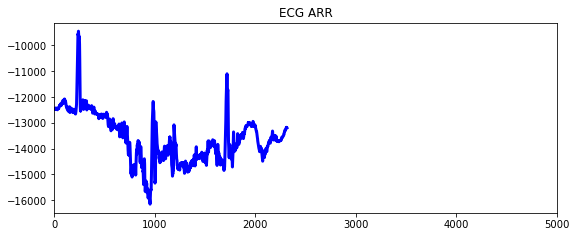

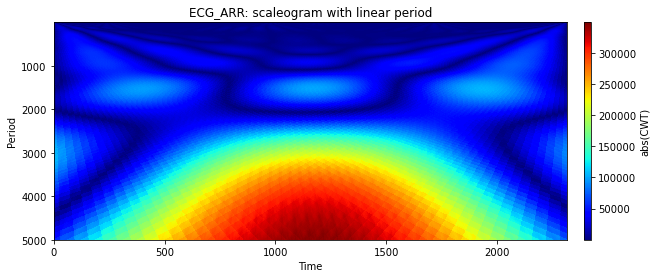

In [9]:
# choose default wavelet function 
scg.set_default_wavelet('morl')

nn = 56
signal_length = 5000
# range of scales to perform the transform
scales = scg.periods2scales( np.arange(1, signal_length+1) )
x_values_wvt_arr = range(0,len(ecg_data[nn]),1)

# plot the signal 
fig1, ax1 = plt.subplots(1, 1, figsize=(9, 3.5));  
ax1.plot(x_values_wvt_arr, ecg_data[nn], linewidth=3, color='blue')
ax1.set_xlim(0, signal_length)
ax1.set_title("ECG ARR")

# the scaleogram
scg.cws(ecg_data[nn][:signal_length], scales=scales, figsize=(10, 4.0), coi = False, ylabel="Period", xlabel="Time",
        title='ECG_ARR: scaleogram with linear period'); 

print("Default wavelet function used to compute the transform:", scg.get_default_wavelet(), "(",
      pywt.ContinuousWavelet(scg.get_default_wavelet()).family_name, ")", " class : ",ecg_labels[nn])

